<a href="https://colab.research.google.com/github/einsteinpan/self/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/2sbmj1vpw7hesa7/case_info.csv

--2022-10-12 09:20:15--  https://www.dropbox.com/s/2sbmj1vpw7hesa7/case_info.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2sbmj1vpw7hesa7/case_info.csv [following]
--2022-10-12 09:20:16--  https://www.dropbox.com/s/raw/2sbmj1vpw7hesa7/case_info.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca11b55c43709e412f819541164.dl.dropboxusercontent.com/cd/0/inline/BurAhe5QXxTjAYjuJLxtJP37pnCkz92aDrhPEnq-XFu8QVQoNdzL5HAIBkgx0tetHVRbNqK1SCePr0PFRFx7MSgE8EsGxvHwSwD9xr4q1XG5lYiyYWa6osSh8TyMIdE_31Ogh04fTvi15NX_hu2tipWxO-ypSwLeX_SRsDl9c0Q-JQ/file# [following]
--2022-10-12 09:20:16--  https://uca11b55c43709e412f819541164.dl.dropboxusercontent.com/cd/0/inline/BurAhe5QXxTjAYjuJLxtJP37pnCkz92aDrhPEnq-XFu8QVQoNdzL5HAIBkgx0tetHVRbNqK1SCePr

In [ ]:
import pandas as pd


data = pd.read_csv('case_info.csv')

In [ ]:
data.head()

,ID,Age,Gender,OD_OS,Diagnosis
0,1906260101,54,M,OD,5
1,1906260201,54,F,OD,5
2,1906260301,50,M,OD,0
3,1906260302,50,M,OS,4
4,1906260402,70,M,OS,5


In [ ]:
data.drop_duplicates(subset='ID', inplace=True)

In [ ]:
data['Diagnosis'].value_counts()

 0    683
 5    413
 4     59
 3     51
 1     25
 2     21
 6     21
-1      5
Name: Diagnosis, dtype: int64

In [ ]:
drop_invalid = data.drop(data[data.Diagnosis < 0].index)
print(drop_invalid["Diagnosis"].value_counts())
print(len(drop_invalid))

0    683
5    413
4     59
3     51
1     25
2     21
6     21
Name: Diagnosis, dtype: int64
1273


In [ ]:
Diagnosis = data.drop(data[data.Diagnosis < 0].index).value_counts()
print(f"有效診斷數量: {Diagnosis.sum()}")

有效診斷數量: 1273


Age Distribution
case數量: 63


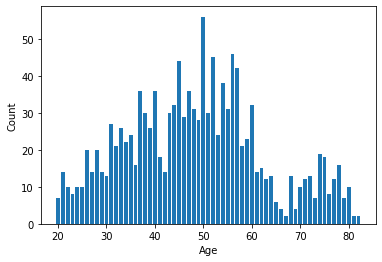

In [ ]:
from matplotlib import pyplot as plt
print("Age Distribution")
age_distribution = drop_invalid['Age'].value_counts()
print(f"case數量: {len(age_distribution)}")
plt.bar(age_distribution.index, age_distribution.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
gender_distribution = drop_invalid['Gender'].value_counts()
print(gender_distribution)

F    659
M    614
Name: Gender, dtype: int64


In [ ]:
eyes_distribution = drop_invalid['OD_OS'].value_counts()
print(eyes_distribution)

OD    637
OS    636
Name: OD_OS, dtype: int64


In [ ]:
print(f"Average Age: {int(drop_invalid['Age'].mean())}")

Average Age: 48


In [ ]:
#age between 30 to 65
age_30_65 = drop_invalid[(drop_invalid['Age'] >= 30) & (drop_invalid['Age'] <= 65)]

In [ ]:
gender_distribution_30_65 = age_30_65['Gender'].value_counts()

print(f"Genders between 30 to 65 total case : {len(age_30_65)}")
print(f"Gender distribution : \n{gender_distribution_30_65}")

Genders between 30 to 65 total case : 987
Gender distribution : 
M    501
F    486
Name: Gender, dtype: int64


In [ ]:
postive_sample = drop_invalid
print(f"Positive sample: \n{postive_sample}")
print(f"Positive sample value counts: \n{postive_sample['Diagnosis'].value_counts()}")
#save postive sample
postive_sample.to_csv('postive_sample.csv', index=False)

Positive sample: 
              ID  Age Gender OD_OS  Diagnosis
0     1906260101   54      M    OD          5
1     1906260201   54      F    OD          5
2     1906260301   50      M    OD          0
3     1906260302   50      M    OS          4
4     1906260402   70      M    OS          5
...          ...  ...    ...   ...        ...
1273  1909060602   62      M    OS          5
1274  1909060701   44      M    OD          0
1275  1909060702   44      M    OS          0
1276  1909060801   49      M    OD          0
1277  1909060802   49      M    OS          0

[1273 rows x 5 columns]
Positive sample value counts: 
0    683
5    413
4     59
3     51
1     25
2     21
6     21
Name: Diagnosis, dtype: int64


In [ ]:
negative_sample = data.drop(data[data.Diagnosis != 0].index)
print(f"Negative sample: \n{negative_sample}")
print(f"Negative sample value counts: \n{negative_sample['Diagnosis'].value_counts()}")
#save negative sample
negative_sample.to_csv('negative_sample.csv', index=False)


Negative sample: 
              ID  Age Gender OD_OS  Diagnosis
2     1906260301   50      M    OD          0
6     1906260502   72      F    OS          0
8     1906260602   29      F    OS          0
12    1906260802   64      F    OS          0
13    1906260901   71      F    OD          0
...          ...  ...    ...   ...        ...
1269  1909060402   43      F    OS          0
1274  1909060701   44      M    OD          0
1275  1909060702   44      M    OS          0
1276  1909060801   49      M    OD          0
1277  1909060802   49      M    OS          0

[683 rows x 5 columns]
Negative sample value counts: 
0    683
Name: Diagnosis, dtype: int64
